In [16]:
import pandas as pd
#import qiime2 as q2
import numpy as np
import biom

# plotting 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def read_results(p):
    return pd.read_csv(p, sep='\t', index_col='Feature')

def unpack_hdi_and_filter(df, col):
    df[['lower', 'upper']] = df[col].str.split(',', expand=True)
    # remove ( from lower and ) from upper and convert to float 
    df.lower = df.lower.str[1:].astype('float')
    df.upper = df.upper.str[:-1].astype('float')
    
    df['credible'] = np.where((df.lower > 0) | (df.upper < 0), 'yes', 'no')
    
    df.upper = df.upper - df[col.replace('hdi', 'mean')]
    df.lower = df[col.replace('hdi', 'mean')] - df.lower
    
    return df

#Add taxonomy data if it is missing from the biom table
def add_taxonomy_to_data(taxonomy,data):
    tax = pd.read_csv(taxonomy, sep = "\t", index_col = "Feature ID")
    dat = pd.read_csv(data, sep = "\t", index_col = "Feature")
    print(tax["Taxon"])
    dat['Taxon'] = tax["Taxon"]
    dat = dat.set_index("Taxon", drop = True)
    return dat

#Check if there are more than 20 features --> if so, only display top and bottom 10 
#Otherwise display all
def display_top_n_feats(df, n, yvar, xvar, xlab, ylab, title):
    if df.shape[0] < 2*n: 
        df_for_display = df 
    else: 
        bottomn = df[:n]
        topn = df[-1*n:]
        df_for_display = pd.concat([bottomn, topn])
    
    sns.stripplot(data=df_for_display, y=yvar, x=xvar)
    plt.errorbar(data=df_for_display, 
                 x=xvar, y=yvar,
                 xerr=df_for_display[['lower', 'upper']].T, ls='none')
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title)
    plt.show()

In [40]:
# Replace the value with your own path. The dataset_name can be anything
dataset_name = "Cancer_Qiita"
result_filepath = '/panfs/btakacs/cancer_qiita/birdman/inferences-results-gibs-genus/cancer_qiita_metaanalysis_birdman-2-gibs-genus.beta_var.tsv'
taxonomy = "/projects/cancer_qiita/btakacs/metaanalysis/mucosa_added_results/classification/taxonomy.tsv"
#This key needs to be the same as your dataset_name. The value is the variable(s) you're interested in, can be a string or a list
vars_to_check = {
    'Cancer_Qiita' : ['tissue_type[T.colorectal mucosa]', 'tissue_type[T.breast]'] 
}

result_dict = {}

This cell is skippable, it is there just to look at your file, to see if your table looks okay.

In [41]:
pd.read_csv(result_filepath, sep = "\t", index_col = "Feature")["fixation_method[T.Fresh frozen]_hdi"]

Feature
k__Bacteria;p__Bacteroidetes;c__[Saprospirae];o__[Saprospirales];f__Chitinophagaceae;g__Flavisolibacter       (-8.41125, -0.393864)
k__Bacteria;p__Chloroflexi;c__Anaerolineae;o__DRC31;f__;g__                                                     (-4.11863, 3.51214)
k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o__Bacteroidales;f__Porphyromonadaceae;g__                          (-2.03529, 4.93102)
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Veillonellaceae;g__Pelosinus                        (-5.38406, 2.73632)
k__Bacteria;p__Cyanobacteria;c__Chloroplast;o__Chlorophyta;f__Mamiellaceae;g__                                  (-3.93696, 3.41608)
                                                                                                                      ...          
k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Sphingomonadales;f__Sphingomonadaceae;__                (-3.48979, 1.77038)
k__Bacteria;p__Firmicutes;c__Clostridia;o__Clostridiales;f__Ruminoco

This is also skippable. You can check here if adding taxonomy to your table works. The taxonomy file comes from the sklearn classification of your data

In [42]:
add_taxonomy_to_data(taxonomy,result_filepath)

Feature ID
AAAACCTACGGGAGGCAGCAGTGAGGAATATTGGGCAATGGGCGAAAGCCTGACCCAGCAACGCCGCGTGGGGGATGAAGGCCTTCGGGTTGTAAACCCCTGTCGGAGGGGACGAGAGCCTTTCGGTTAATAGCCGGAAGGTGCGACGGT                                          k__Bacteria
AAAACCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGGTAGCCTGAACCAGCCAAGTAGCGTGAAGGATGAAGGCTCTATGGGTCGTAAACTTCTTTTATATAAGAATAAAGTGCAGTATGTATACTGTTTTGTATGTATTAT    k__Bacteria; p__Bacteroidetes; c__Bacteroidia;...
AAAACCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCAACGCCGCGTGAACGATGAAGGTCTTCGGATCGTAAAGTTCTGTTGCAGGGGAAGATAATGACGGTACCCTGTGAGGAAGCCCCGGCTAAC    k__Bacteria; p__Firmicutes; c__Clostridia; o__...
AAAACCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGCGAAAGCCTGATGCAGCAACGCCGCGTGAGGGAAGACGGTTTTCGGATTGTAAACCTCTGTTTTCGGTGACGAACAAATGACGGTAACCGAGTAGGAAGCCACGGCTA    k__Bacteria; p__Firmicutes; c__Clostridia; o__...
AAAACCTACGGGAGGCAGCAGTGGGGGATATTGCACAATGGAGGAAACTCTGATGCAGCGACGCCGCGTGAGTGAAGAAGTATTTCGGTATGTAAAGCTCTATCAGCAGGGAAGATGATGACGGTACCTGACTAAGAAGCCCCGGCTAAC    k__Bacteria; p__Fir

,Intercept_mean,fixation_method[T.Fresh frozen]_mean,fixation_method[T.Other]_mean,tissue_type[T.breast]_mean,tissue_type[T.colorectal]_mean,tissue_type[T.colorectal mucosa]_mean,tissue_type[T.easophagal mucosa]_mean,tissue_type[T.gastric]_mean,tissue_type[T.gastric mucosa]_mean,tissue_type[T.lung]_mean,...,fixation_method[T.Fresh frozen]_hdi,fixation_method[T.Other]_hdi,tissue_type[T.breast]_hdi,tissue_type[T.colorectal]_hdi,tissue_type[T.colorectal mucosa]_hdi,tissue_type[T.easophagal mucosa]_hdi,tissue_type[T.gastric]_hdi,tissue_type[T.gastric mucosa]_hdi,tissue_type[T.lung]_hdi,tissue_type[T.pancreatic]_hdi
Taxon,,,,,,,,,,,,,,,,,,,,,
NaN,-14.607322,-4.448864,-2.017703,-0.826874,-1.031076,-1.916356,-0.155025,2.562078,-0.787930,-0.571484,...,"(-8.41125, -0.393864)","(-6.70394, 2.22938)","(-5.89127, 3.85496)","(-6.30664, 3.5661)","(-6.52623, 2.63193)","(-5.54414, 5.16173)","(-1.19246, 6.532)","(-6.16796, 4.31032)","(-5.52433, 4.39023)","(-5.62235, 4.17493)"
NaN,-16.490818,-0.082686,-2.363820,-1.495008,-1.955933,2.405499,-0.416411,-1.487317,-0.461993,-1.319876,...,"(-4.11863, 3.51214)","(-6.90444, 2.35839)","(-5.71205, 3.15849)","(-6.41219, 2.65567)","(-1.28621, 5.99357)","(-6.06447, 4.54723)","(-6.68855, 3.31183)","(-6.03638, 4.70815)","(-5.76187, 3.71274)","(-6.18858, 4.48278)"
NaN,-14.614376,1.311891,-2.516511,-2.858141,-3.457619,-0.203035,-0.916591,-2.489870,-0.694394,-2.587950,...,"(-2.03529, 4.93102)","(-6.90444, 2.20536)","(-6.86287, 1.10562)","(-7.4907, 0.670074)","(-3.75931, 3.03446)","(-5.98632, 3.89798)","(-7.31855, 1.75274)","(-6.05674, 4.41941)","(-6.57842, 1.71098)","(-6.0722, 4.0674)"
NaN,-15.862981,-1.329671,-1.691065,-1.232328,2.744831,-1.732313,-0.420562,-1.349091,-0.575543,-1.074192,...,"(-5.38406, 2.73632)","(-6.17686, 2.69562)","(-5.71876, 3.36519)","(-1.05599, 6.74998)","(-6.43364, 2.51953)","(-6.05584, 4.7017)","(-6.28602, 3.32053)","(-5.35948, 4.76975)","(-6.01032, 3.5893)","(-5.62082, 4.47123)"
NaN,-16.669210,-0.394860,-2.285600,-1.394903,-1.830300,1.987842,-0.470596,-1.301526,-0.488423,-1.183141,...,"(-3.93696, 3.41608)","(-6.42843, 2.5773)","(-5.91685, 3.29116)","(-6.49938, 2.4998)","(-1.69868, 5.43972)","(-5.73761, 4.92938)","(-6.11445, 2.98993)","(-5.81907, 4.47527)","(-6.23787, 3.2354)","(-5.96966, 4.57104)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,-7.077162,-0.927294,0.492643,2.352376,0.680943,-1.546171,-0.787163,-1.742667,-4.852055,1.915897,...,"(-3.48979, 1.77038)","(-2.57819, 3.64867)","(-0.810004, 5.17562)","(-2.27854, 3.6245)","(-4.15691, 1.23665)","(-4.29076, 3.02071)","(-4.67181, 1.21582)","(-8.94204, -0.64829)","(-1.05326, 4.87179)","(-2.10005, 5.73724)"
NaN,-7.950092,0.454094,-0.302695,-0.590979,3.363836,3.842554,-0.416719,-6.125761,-4.135677,-0.871371,...,"(-2.29836, 3.34164)","(-3.04883, 2.95437)","(-3.97918, 2.42371)","(0.429809, 5.90498)","(0.98616, 6.38084)","(-4.22723, 3.08661)","(-9.83795, -2.72701)","(-8.38891, 0.044076)","(-3.76969, 1.77956)","(-2.45329, 5.09444)"
NaN,-6.554654,-0.243023,0.637541,4.276836,1.150332,-1.781726,0.122308,-1.911134,-5.397299,2.041887,...,"(-2.94252, 2.51859)","(-2.24472, 3.70852)","(1.30032, 7.17393)","(-1.63062, 3.99986)","(-4.34926, 1.03972)","(-3.14082, 3.54764)","(-4.88327, 1.08319)","(-9.57894, -1.58903)","(-0.820091, 4.83772)","(-3.51755, 3.83078)"


Update the variable names

In [43]:
df = read_results(result_filepath)
#Uncomment this and comment out the one above if you want to add taxonomy
#df = add_taxonomy_to_data("/projects/cancer_qiita/btakacs/metaanalysis/mucosa_added_results/classification/taxonomy.tsv", result_filepath)
for v in vars_to_check: 
    if isinstance(vars_to_check[v],str):
        var = vars_to_check[v]
        print('Unfiltered Shape:  ' + str(df.shape))
        sub_df = unpack_hdi_and_filter(df, var+'_hdi')
        print('Filtered Shape: ' + str(sub_df.loc[sub_df['credible'] == 'yes'].shape))
        sub_df.rename_axis(index='Feature', inplace=True)
        result_dict[var] = sub_df.sort_values(by=var+'_mean')
    else:
        for var in vars_to_check[v]:
            print(var)
            print('Unfiltered Shape:  ' + str(df.shape))
            sub_df = unpack_hdi_and_filter(df, var+'_hdi')
            print('Filtered Shape: ' + str(sub_df.loc[sub_df['credible'] == 'yes'].shape))
            sub_df.rename_axis(index='Feature', inplace=True)
            result_dict[var] = sub_df.sort_values(by=var+'_mean')

tissue_type[T.colorectal mucosa]
Unfiltered Shape:  (908, 33)
Filtered Shape: (90, 36)
tissue_type[T.breast]
Unfiltered Shape:  (908, 36)
Filtered Shape: (63, 36)


Create a graph for each variable

                                               Feature  Intercept_mean  \
0                       k__Bacteria;p__OD1;__;__;__;__      -12.611257   
1    k__Bacteria;p__Bacteroidetes;c__Flavobacteriia...       -9.946290   
2    k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...       -9.838017   
3    k__Bacteria;p__Firmicutes;c__Bacilli;o__Lactob...       -9.688823   
4    k__Bacteria;p__Verrucomicrobia;c__Verrucomicro...      -10.118928   
..                                                 ...             ...   
903  k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...      -12.821337   
904  k__Bacteria;p__Proteobacteria;c__Gammaproteoba...      -17.262535   
905  k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...      -11.736607   
906  k__Bacteria;p__Proteobacteria;c__Alphaproteoba...      -12.956512   
907  k__Bacteria;p__Actinobacteria;c__Actinobacteri...      -15.202267   

     fixation_method[T.Fresh frozen]_mean  fixation_method[T.Other]_mean  \
0                                4.

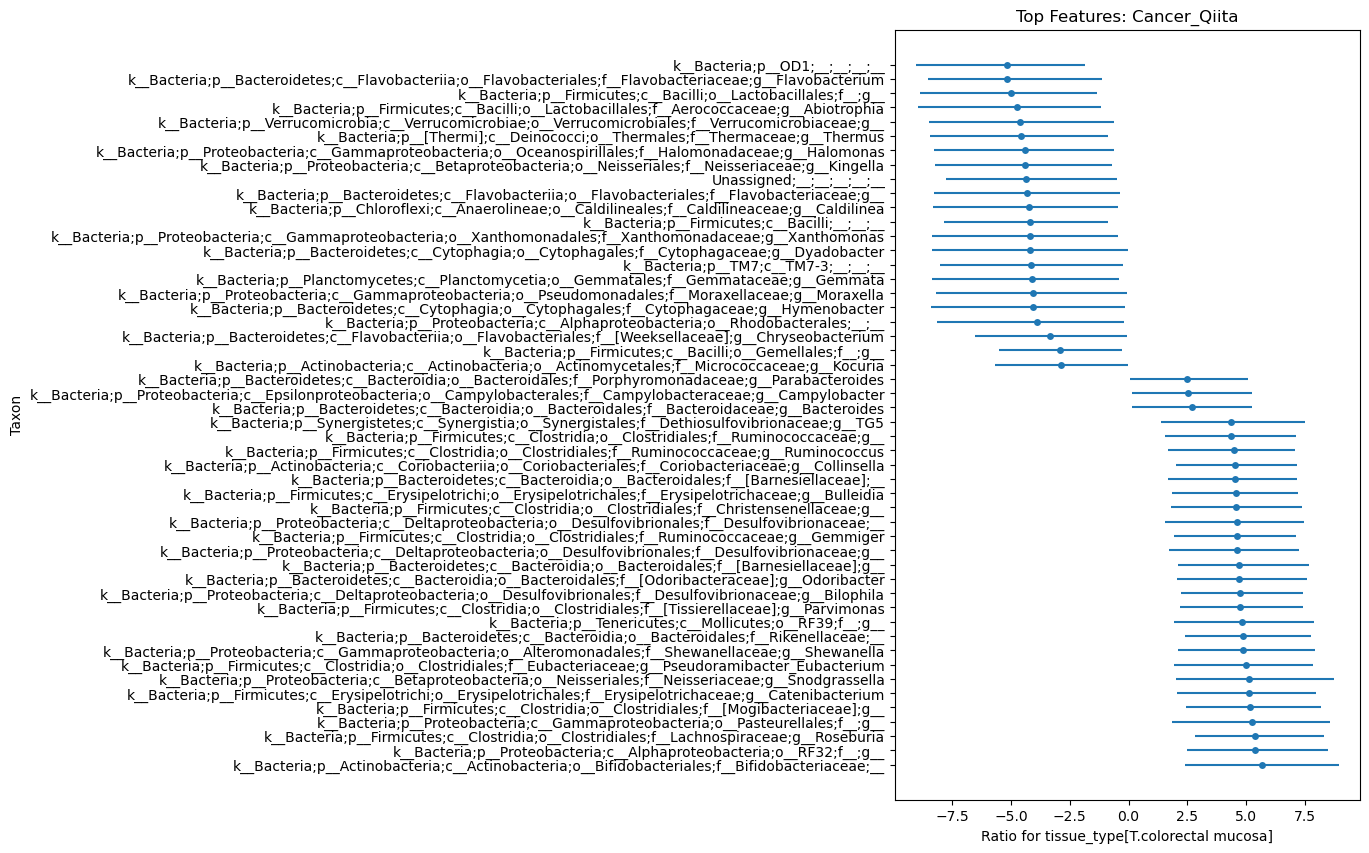

                                               Feature  Intercept_mean  \
0    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...       -8.904893   
1                            Unassigned;__;__;__;__;__      -13.549094   
2    k__Bacteria;p__Bacteroidetes;c__Bacteroidia;o_...      -10.362580   
3    k__Bacteria;p__Firmicutes;c__Clostridia;o__Clo...      -11.481439   
4    k__Bacteria;p__Proteobacteria;c__Betaproteobac...       -8.611254   
..                                                 ...             ...   
903  k__Bacteria;p__Proteobacteria;c__Betaproteobac...       -6.449998   
904  k__Bacteria;p__Gemmatimonadetes;c__Gemmatimona...      -14.932070   
905  k__Bacteria;p__Proteobacteria;c__Alphaproteoba...      -10.650548   
906  k__Bacteria;p__Proteobacteria;c__Betaproteobac...      -12.078055   
907  k__Bacteria;p__Proteobacteria;c__Betaproteobac...       -7.080189   

     fixation_method[T.Fresh frozen]_mean  fixation_method[T.Other]_mean  \
0                               -0.

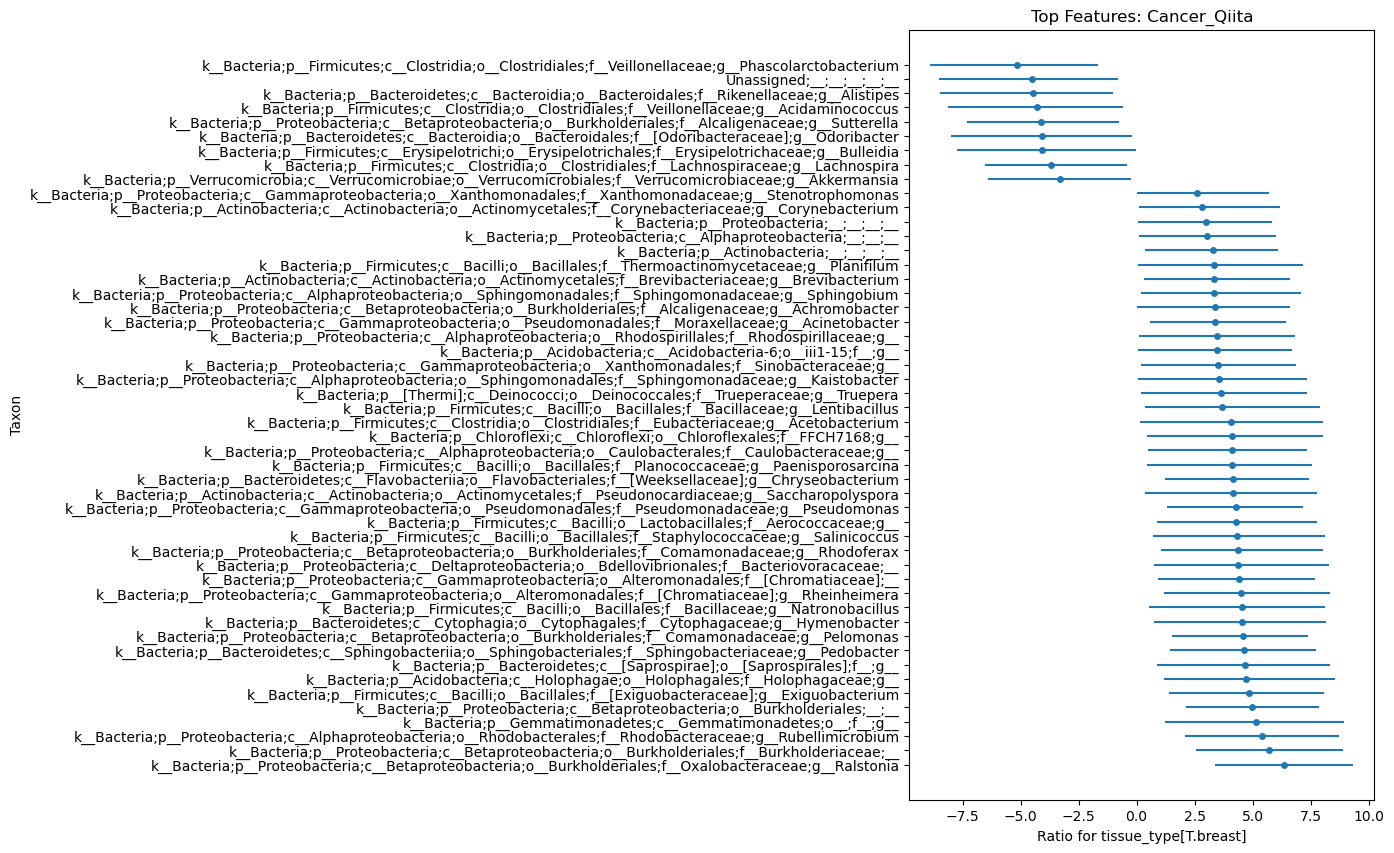

In [44]:
for k in result_dict.keys(): 
    xlab = 'Ratio for ' + k
    ylab = 'Taxon'
    df_for_display = result_dict[k].reset_index()
    df_for_display = df_for_display.loc[df_for_display.credible == 'yes']
    fig, ax = plt.subplots(figsize=(6, 10))
    print(df_for_display)
    display_top_n_feats(df_for_display, 25, 'Feature', k+'_mean', xlab, ylab,
                                'Top Features: ' + dataset_name)            